Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Time: 8.07 seconds
Final Training Loss: 0.2948
Final Validation Loss: 0.5626
Final Training MAE: 0.3968
Final Validation MAE: 0.5504


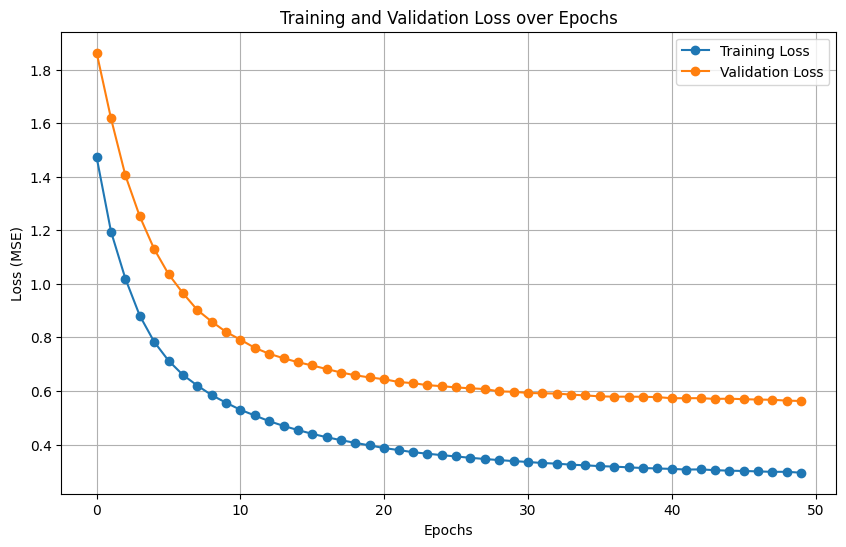

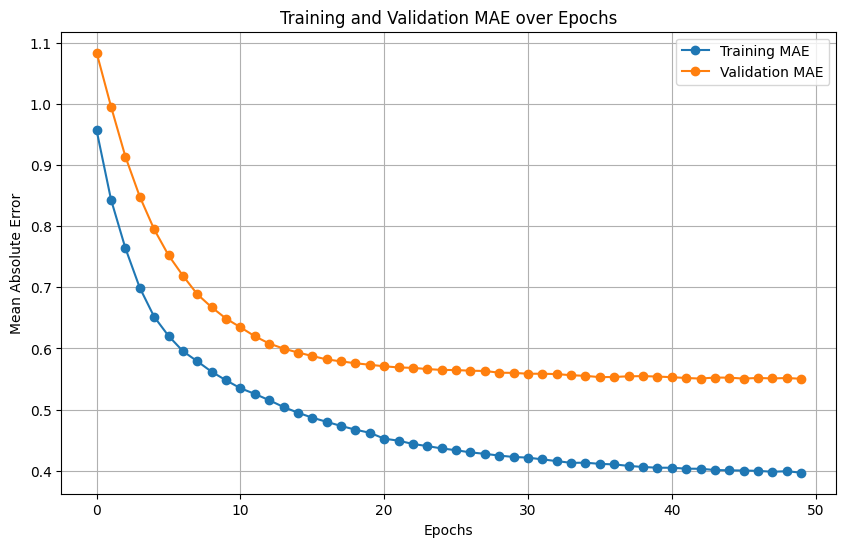

In [ ]:
# Mount Google Drive
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/Course Fall 24/Intro to ML/Assignment 2/Housing.csv'
housing_data = pd.read_csv(file_path)

# Separate features and target
X = housing_data.drop(columns=['price'])
y = housing_data['price']

# Define preprocessing for numerical and categorical columns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
import numpy as np
import time

numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                        'airconditioning', 'prefarea', 'furnishingstatus']

# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Standardize the target variable (y) to improve model performance
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1))

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
import time
start_time = time.time()
history = model.fit(X_train, y_train_scaled, epochs=50, validation_data=(X_val, y_val_scaled), verbose=0)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Evaluate the model
loss, mae = model.evaluate(X_val, y_val_scaled, verbose=0)

# Print final results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final Training MAE: {history.history['mae'][-1]:.4f}")
print(f"Final Validation MAE: {history.history['val_mae'][-1]:.4f}")

import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE', marker='o')
plt.plot(history.history['val_mae'], label='Validation MAE', marker='o')
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


Training Time: 9.23 seconds
Final Training Loss: 0.2429
Final Validation Loss: 0.6002
Final Training MAE: 0.3529
Final Validation MAE: 0.5663


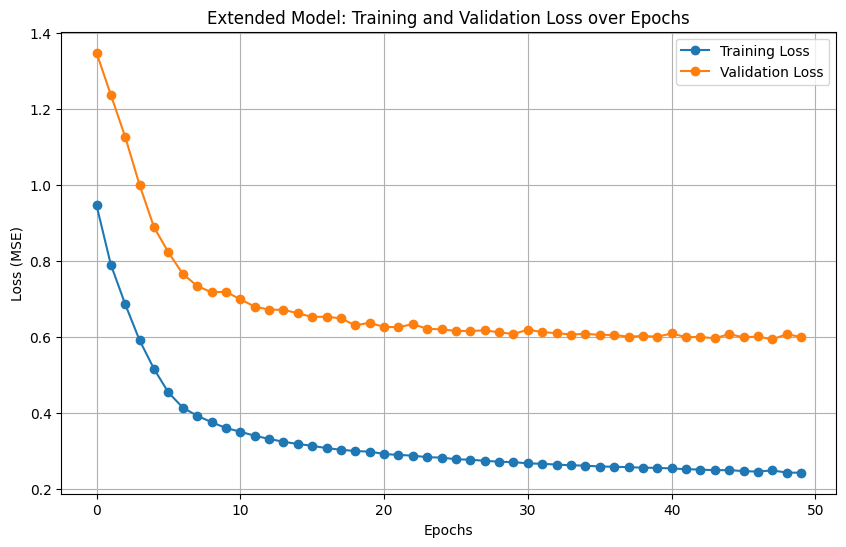

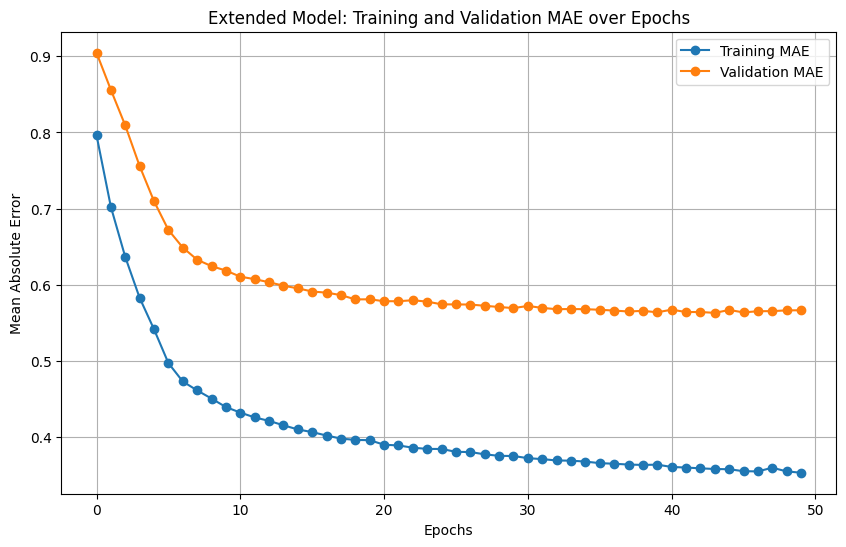

In [ ]:
# Define the extended model with additional hidden layers
extended_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
extended_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
start_time = time.time()
extended_history = extended_model.fit(X_train, y_train_scaled, epochs=50, validation_data=(X_val, y_val_scaled), verbose=0)
end_time = time.time()

# Calculate training time
extended_training_time = end_time - start_time

# Evaluate the model
extended_loss, extended_mae = extended_model.evaluate(X_val, y_val_scaled, verbose=0)

# Print final results
print(f"Training Time: {extended_training_time:.2f} seconds")
print(f"Final Training Loss: {extended_history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {extended_history.history['val_loss'][-1]:.4f}")
print(f"Final Training MAE: {extended_history.history['mae'][-1]:.4f}")
print(f"Final Validation MAE: {extended_mae:.4f}")

# Plot results
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(extended_history.history['loss'], label='Training Loss', marker='o')
plt.plot(extended_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Extended Model: Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation MAE
plt.figure(figsize=(10, 6))
plt.plot(extended_history.history['mae'], label='Training MAE', marker='o')
plt.plot(extended_history.history['val_mae'], label='Validation MAE', marker='o')
plt.title('Extended Model: Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Time: 15.52 seconds
Final Training Loss: 0.0484
Final Validation Loss: 0.0569
Final Training Accuracy: 0.9846
Final Validation Accuracy: 0.9737


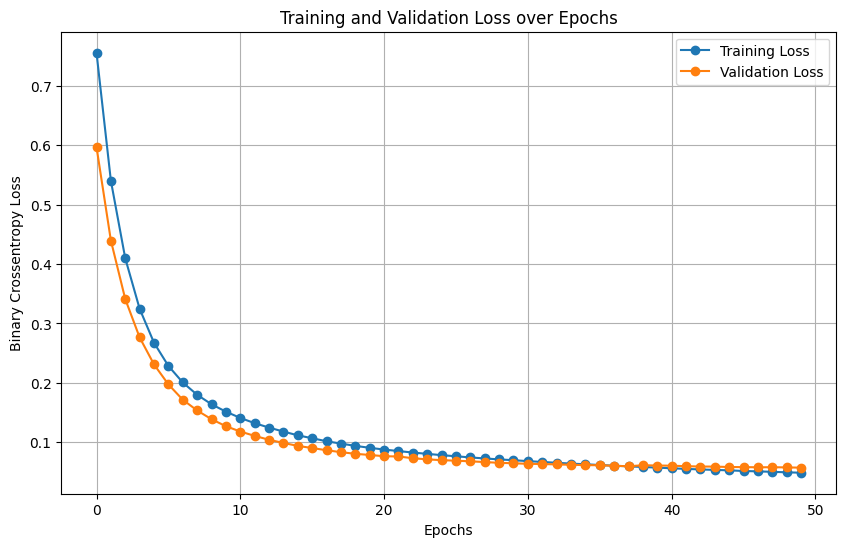

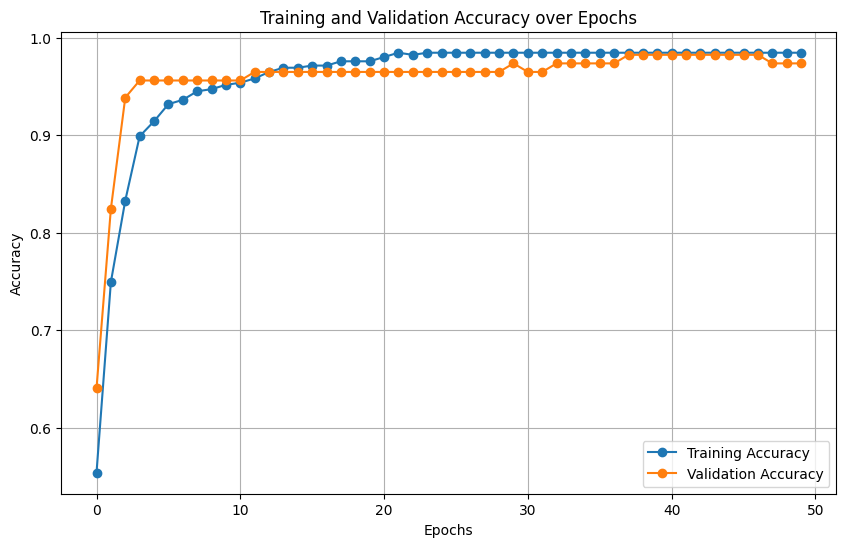

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import time
import numpy as np

# Load the cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val), verbose=0)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Evaluate the model
loss, accuracy = model.evaluate(X_val_scaled, y_val, verbose=0)

# Print final results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {accuracy:.4f}")

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Training Time: 8.17 seconds
Final Training Loss: 0.0010
Final Validation Loss: 0.2014
Final Training Accuracy: 1.0000
Final Validation Accuracy: 0.9649


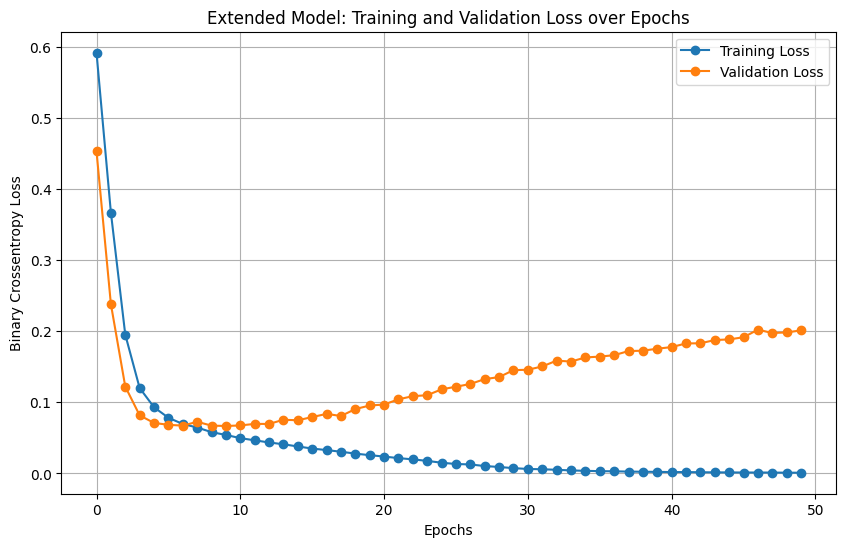

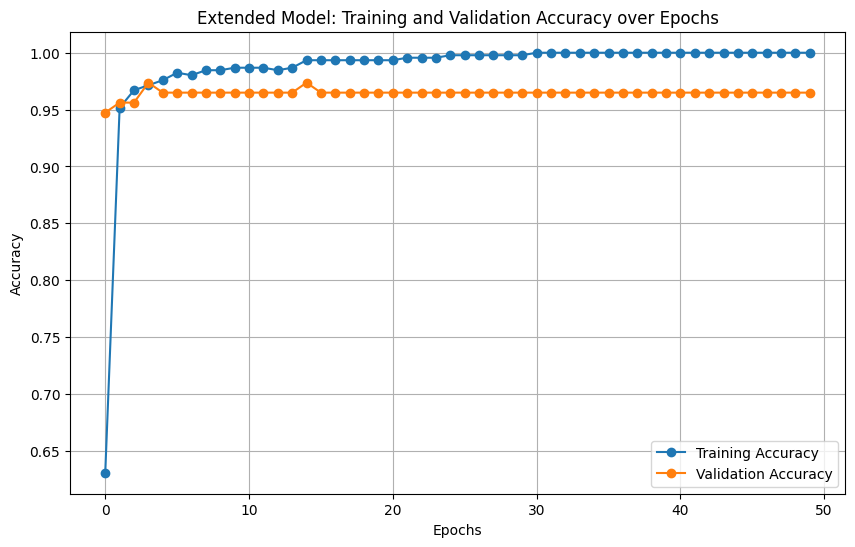

In [ ]:
# Define the extended model with additional hidden layers
extended_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the extended model
extended_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the extended model
import time
start_time = time.time()
extended_history = extended_model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val), verbose=0)
end_time = time.time()

# Calculate training time
extended_training_time = end_time - start_time

# Evaluate the extended model
extended_loss, extended_accuracy = extended_model.evaluate(X_val_scaled, y_val, verbose=0)

# Print final results
print(f"Training Time: {extended_training_time:.2f} seconds")
print(f"Final Training Loss: {extended_history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {extended_history.history['val_loss'][-1]:.4f}")
print(f"Final Training Accuracy: {extended_history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {extended_accuracy:.4f}")

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(extended_history.history['loss'], label='Training Loss', marker='o')
plt.plot(extended_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Extended Model: Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(extended_history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(extended_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Extended Model: Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training Time: 2019.40 seconds
Final Training Loss: 1.3279
Final Validation Loss: 1.5598
Final Training Accuracy: 0.5253
Final Validation Accuracy: 0.4575


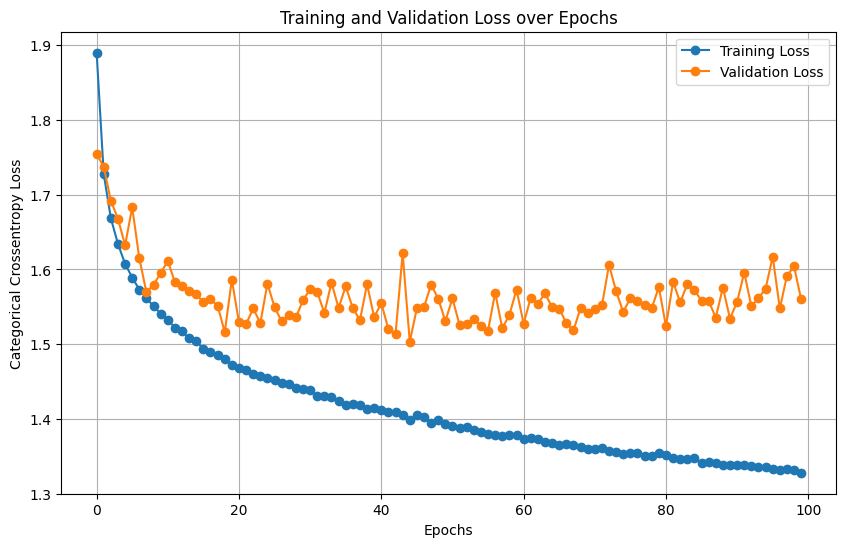

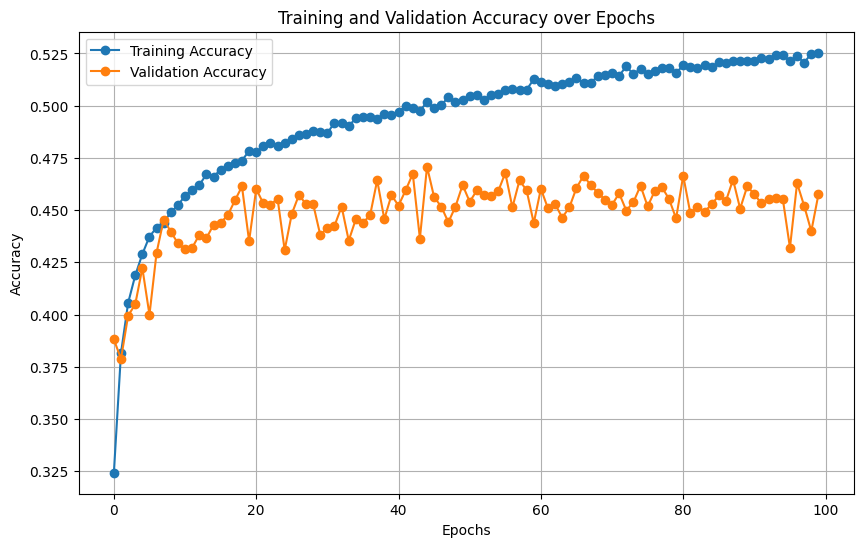

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the image data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the image data for fully connected layers
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_flat.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(X_train_flat, y_train_onehot, epochs=100, validation_data=(X_test_flat, y_test_onehot), verbose=0)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Evaluate the model
loss, accuracy = model.evaluate(X_test_flat, y_test_onehot, verbose=0)

# Print final results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {accuracy:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Training Time: 3304.91 seconds
Final Training Loss: 0.6683
Final Validation Loss: 3.6074
Final Training Accuracy: 0.7563
Final Validation Accuracy: 0.4325


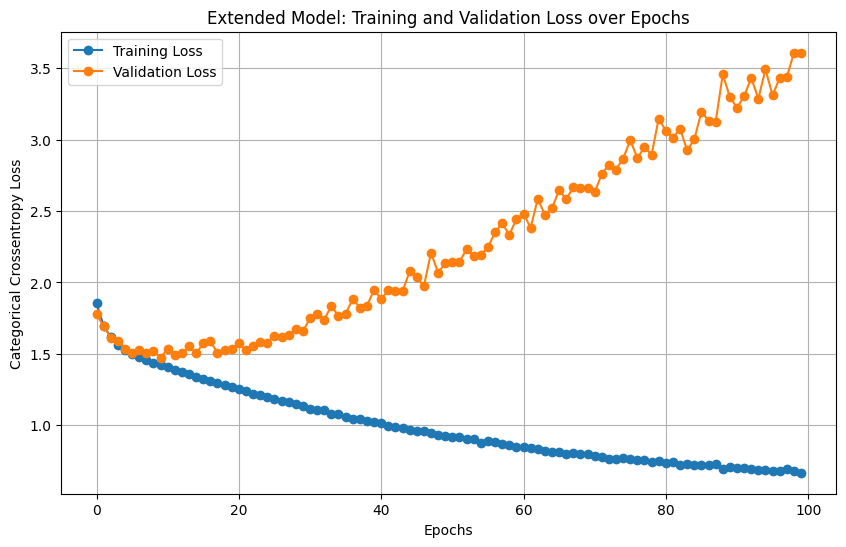

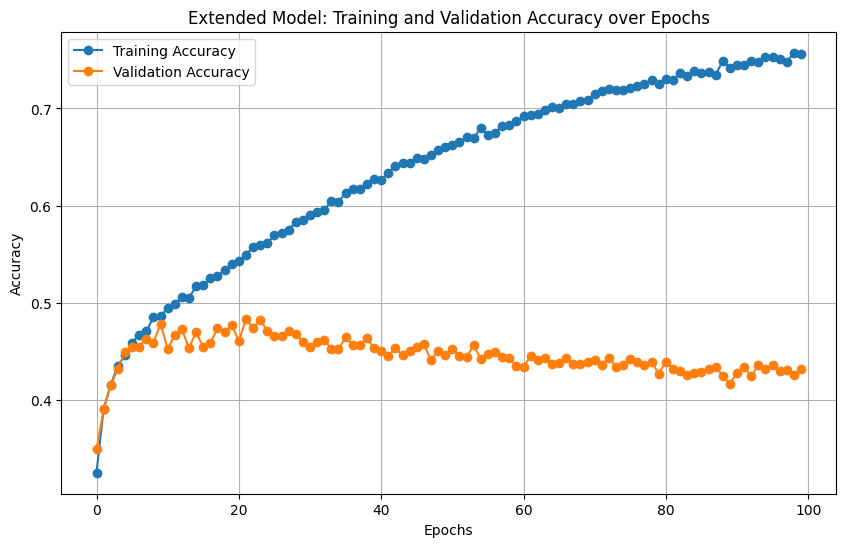

In [ ]:
# Define the extended model with additional hidden layers
extended_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_flat.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
extended_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the extended model
import time
start_time = time.time()
extended_history = extended_model.fit(X_train_flat, y_train_onehot, epochs=100, validation_data=(X_test_flat, y_test_onehot), verbose=0)
end_time = time.time()

# Calculate training time
extended_training_time = end_time - start_time

# Evaluate the extended model
extended_loss, extended_accuracy = extended_model.evaluate(X_test_flat, y_test_onehot, verbose=0)

# Print final results
print(f"Training Time: {extended_training_time:.2f} seconds")
print(f"Final Training Loss: {extended_history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {extended_history.history['val_loss'][-1]:.4f}")
print(f"Final Training Accuracy: {extended_history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {extended_accuracy:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(extended_history.history['loss'], label='Training Loss', marker='o')
plt.plot(extended_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Extended Model: Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(extended_history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(extended_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Extended Model: Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
